<a href="https://colab.research.google.com/github/LucasParreirasDS/Studying/blob/main/ExercicioKobeBPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Arremessos Kobe Bryant

## 1.   Baixar os dados do database do Kaggle sobre os arremessos do  Kobe Bryant e criar um dataframe de pandas










In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Montando drive para ler o dataset
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/Datasets/'
file_name = 'kobe_bryant_shots_data.csv'

# carregando dataset
file_path = path + file_name
df = pd.read_csv(file_path)

Mounted at /content/drive/


In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


## 2.  Conte quantos arremessos foram convertidos (shot_made_flag)

In [4]:
df['shot_made_flag']

0        NaN
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
30692    0.0
30693    NaN
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 30697, dtype: float64

In [5]:
df[['shot_made_flag']].isnull().sum()

shot_made_flag    5000
dtype: int64

In [6]:
# Retirando linhas em que 'shot_made_flag' é NaN
df = df[~df['shot_made_flag'].isnull()]

In [7]:
df[['shot_made_flag']].isnull().sum()

shot_made_flag    0
dtype: int64

In [9]:
# Resposta
num_convert = df['shot_made_flag'].loc[df['shot_made_flag'] == 1].count()
print(f' N° de arremessos convertidos: {num_convert}')

 N° de arremessos convertidos: 11465


## 3.  Calcule qual foi a taxa de sucesso (eficiência) para todos os arremessos (total de arremessos covertidos/ total de arremessos feitos)

In [10]:
# Resposta
convert_percent = (num_convert/df.shape[0])*100
print(f'Taxa de sucesso: {convert_percent.round(2)}%')

Taxa de sucesso: 44.62%


## 4.  Qual foi o arremesso convertido mais distante?

In [11]:
# Criando DF para arremesoss convertidos
convert = df.loc[df['shot_made_flag'] == 1]
convert.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12


In [12]:
# Resposta
print(f'O arremesso mais distante convertido foi de {max(convert.shot_distance)} ft (pés)')

O arremesso mais distante convertido foi de 43 ft (pés)


## 5.  Qual a distância média dos arremessos convertidos? Qual a distância média dos arremessos não-convertidos?

In [13]:
# Criando DF para arremesoss não-convertidos
no_convert = df.loc[df['shot_made_flag'] == 0]
no_convert.head()

In [14]:
# Resposta arremessos convertidos
convert.shot_distance.mean()

11.383427823811601

In [15]:
# Resposta arremessos não-convertidos
no_convert.shot_distance.mean()

15.12759977515458

In [20]:
print(f'Distância media de arremessos convertidos: {round(convert.shot_distance.mean(), 2)}ft\nDistância media de arremessos não convertidos: {round(no_convert.shot_distance.mean(), 2)}ft')

Distância media de arremessos convertidos: 11.38ft
Distância media de arremessos não convertidos: 15.13ft


## 6.  Qual o quarto do jogo que o Kobe Bryant é mais eficiente?

In [21]:
df.period.value_counts()

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

In [29]:
point = df.groupby(by='period')['shot_made_flag'].sum()
point

period
1    3120.0
2    2529.0
3    3175.0
4    2500.0
5     124.0
6      14.0
7       3.0
Name: shot_made_flag, dtype: float64

In [28]:
count = df.groupby(by='period')['shot_made_flag'].count()
count

period
1    6700
2    5635
3    7002
4    6043
5     280
6      30
7       7
Name: shot_made_flag, dtype: int64

In [33]:
(point/count).sort_values(ascending=False)

period
6    0.466667
1    0.465672
3    0.453442
2    0.448802
5    0.442857
7    0.428571
4    0.413702
Name: shot_made_flag, dtype: float64

In [35]:
print('Melhor quarto: 6º\nMelhor quarto contando apenas os 4 regulares: 1°')

Melhor quarto: 6º
Melhor quarto contando apenas os 4 regulares: 1°


## 7.  Agrupe pelo tipo de arremesso e descubra qual tipo de arremesso que o Kobe Bryant é mais eficiente.

In [39]:
point = df.groupby(by='shot_type')['shot_made_flag'].sum()
point

shot_type
2PT Field Goal    9683.0
3PT Field Goal    1782.0
Name: shot_made_flag, dtype: float64

In [40]:
count = df.groupby(by='shot_type')['shot_made_flag'].count()
count

shot_type
2PT Field Goal    20285
3PT Field Goal     5412
Name: shot_made_flag, dtype: int64

In [46]:
shot_type_eff = point/count*100
shot_type_eff

shot_type
2PT Field Goal    47.734779
3PT Field Goal    32.926829
Name: shot_made_flag, dtype: float64

In [50]:
print(f'Ele é mais eficiente nos arremessos de 2 pontos.\n\n2PT:: {shot_type_eff.iloc[0].round(2)}%\n3PT: {shot_type_eff.iloc[1].round(2)}%')

Ele é mais eficiente nos arremessos de 2 pontos.

2PT:: 47.73%
3PT: 32.93%


## 8.  Qual foi a melhor temporada do Kobe Bryant em relação a percentual de cestas convertidas?

In [51]:
df.groupby(by='season')['shot_made_flag'].sum()

season
1996-97    162.0
1997-98    349.0
1998-99    351.0
1999-00    604.0
2000-01    735.0
2001-02    783.0
2002-03    808.0
2003-04    594.0
2004-05    492.0
2005-06    873.0
2006-07    723.0
2007-08    852.0
2008-09    866.0
2009-10    804.0
2010-11    679.0
2011-12    603.0
2012-13    608.0
2013-14     24.0
2014-15    223.0
2015-16    332.0
Name: shot_made_flag, dtype: float64

In [52]:
df.groupby(by='season')['shot_made_flag'].count()

season
1996-97     383
1997-98     810
1998-99     765
1999-00    1312
2000-01    1575
2001-02    1708
2002-03    1852
2003-04    1371
2004-05    1127
2005-06    1924
2006-07    1579
2007-08    1819
2008-09    1851
2009-10    1772
2010-11    1521
2011-12    1416
2012-13    1328
2013-14      59
2014-15     593
2015-16     932
Name: shot_made_flag, dtype: int64

In [53]:
season_eff = df.groupby(by='season')['shot_made_flag'].sum()/df.groupby(by='season')['shot_made_flag'].count()

In [54]:
season_eff.sort_values(ascending=False)

season
2007-08    0.468389
2008-09    0.467855
2000-01    0.466667
1999-00    0.460366
1998-99    0.458824
2001-02    0.458431
2006-07    0.457885
2012-13    0.457831
2005-06    0.453742
2009-10    0.453725
2010-11    0.446417
2004-05    0.436557
2002-03    0.436285
2003-04    0.433260
1997-98    0.430864
2011-12    0.425847
1996-97    0.422977
2013-14    0.406780
2014-15    0.376054
2015-16    0.356223
Name: shot_made_flag, dtype: float64

In [58]:
print(f'A melhor temporada foi 07-08 com 46.83% de aproveitamento')

A melhor temporada foi 07-08 com 46.83% de aproveitamento


## 9.  Agrupe pela temporada e pelo tipo de arremesso

In [62]:
df.replace({'2PT Field Goal': 2, '3PT Field Goal': 3}, inplace=True)

In [63]:
df['points'] = df.shot_type*df.shot_made_flag

In [64]:
df.points.value_counts()

0.0    14232
2.0     9683
3.0     1782
Name: points, dtype: int64

In [66]:
df['shot_type'].value_counts()


2    20285
3     5412
Name: shot_type, dtype: int64

In [68]:
pd.DataFrame(df.groupby(by=['season', 'shot_type'])['points'].count())

points
season  shot_type        
1996-97 2             256
        3             127
1997-98 2             617
        3             193
1998-99 2             654
        3             111
1999-00 2            1135
        3             177
2000-01 2            1380
        3             195
2001-02 2            1547
        3             161
2002-03 2            1531
        3             321
2003-04 2            1105
        3             266
2004-05 2             793
        3             334
2005-06 2            1459
        3             465
2006-07 2            1230
        3             349
2007-08 2            1387
        3             432
2008-09 2            1479
        3             372
2009-10 2            1406
        3             366
2010-11 2            1191
        3             330
2011-12 2            1114
        3             302
2012-13 2             993
        3             335
2013-14 2              47
        3              12
2014-15 2             434
        3             159
2015-16 2             527
        3             405

## 10. Faça dois gráficos: posição em quadra dos arremessos perdidos x posição em quadra dos arremessos acertados

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
convert[['loc_x',	'loc_y']]

,loc_x,loc_y
2,-101,135
4,0,0
6,0,0
8,-65,108
11,121,127
...,...,...
30674,117,216
30676,-141,0
30681,-18,261
30688,-126,61


In [84]:
no_convert[['loc_x',	'loc_y']]

,loc_x,loc_y
1,-157,0
3,138,175
5,-145,-11
9,-33,125
10,-94,238
...,...,...
30690,-113,100
30691,0,0
30692,1,48
30695,31,267


Text(0.5, 1.0, 'Arremessos errados')

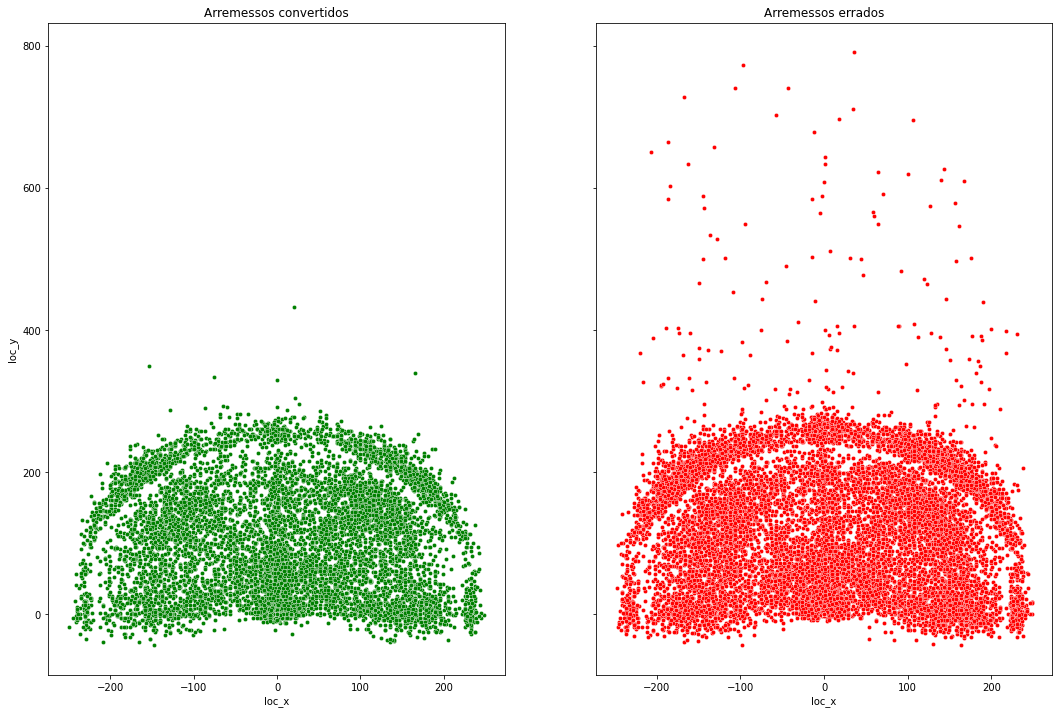

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(18, 12), sharey=True)
ax1 = sns.scatterplot(x='loc_x', y='loc_y', data=convert, color='g', s=17.5, ax=ax[0])
ax1.set_title('Arremessos convertidos')

ax2 = sns.scatterplot(x='loc_x', y='loc_y', data=no_convert, color='r', s=17.5, ax=ax[1])
ax2.set_title('Arremessos errados')